# SCP-2602: Data analysis report of the information available about a former library

## Introduction

[SCP-2602](https://scp-wiki.wikidot.com/scp-2602) used to be a library. Thanks to an extensive analysis of SCP data, we can conclude that the large majority, if not the totality, of the facts we know about it, are a result of the fact that it was once a library.

## Setup
If needed, uncomment lines below to install the corresponding packages.

In [47]:
#!pip install kagglehub
#!pip install pandas
#!pip install matplotlib

In [502]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import re

pd.set_option('display.max_colwidth', None)

def contains_count(string, elements):
    count = 0
    for element in elements:
        count += string.count(element)
    return count

def get_class(text):
    x = re.findall("\\n (\w*) Class: (\w*) \\n", text)
    if x :
        #if len(list(x[0])) != 2:
        #    print (len(list(x[0])))
        return(list(x[0]))
    else:
        #if len(["None", "None"]) != 2:
        #    print(["None", "None"])
        return ["None", "None"]
def get_class_type(text):
    return get_class(text)[0]
def get_class_spec(text):
    return get_class(text)[1]

## Dataset
I decided to download the [SCP 001 to 6999](https://www.kaggle.com/datasets/czzzzzzz/scp1to7/) dataset available on Kaggle.

In [92]:
path = kagglehub.dataset_download("czzzzzzz/scp1to7")

In [93]:
df = pd.read_csv(f"{path}/scp6999.csv")

In [104]:
df.columns

Index(['code', 'title', 'text', 'image captions', 'rating', 'state', 'tags',
       'link'],
      dtype='object')

## SCP-2602, a former library

Here is the information the dataset contains about SCP-2602:

In [106]:
former_library_row = df.loc[df['code'] == 'SCP-2602']
former_library_row

code             title  \
2601  SCP-2602  "Exbibliothetic"   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Notably, we learn that, prior to developing its anomalous behavior, SCP-2602 was a library from 1921-06-08 to 1988-04-29. It was then a non-anomalous former library from 1988-04-30 to an unspecified date in 2004-10.

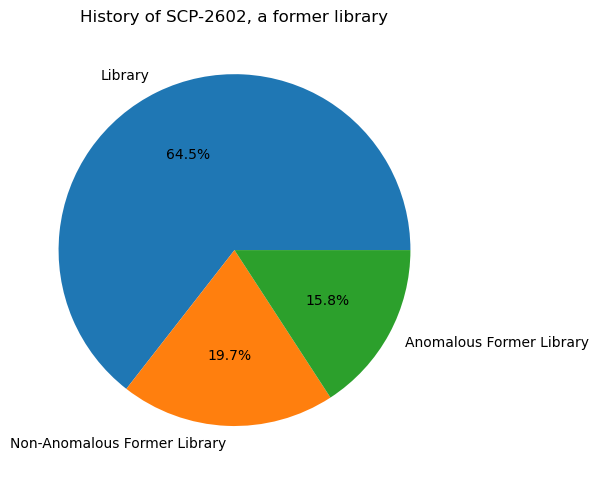

In [160]:
d0 = date(1921, 6, 8) # opening
d1 = date(1988, 4, 30) # first day as a former library
d2 = date(2008, 10, 16) # first day as an anomalous former library
d3 = date.today()

library = (d1 - d0).days
former_library = (d2 - d1).days
anom_former_library = (d3 - d2).days

data = {
    "Status": ["Library", "Non-Anomalous Former Library", "Anomalous Former Library"],
    "Duration": [library, former_library, anom_former_library]
}

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(days_df["Duration"], labels=days_df["Status"], autopct='%.1f%%')
ax.set_title('History of SCP-2602, a former library')
plt.tight_layout()

The chart above shows that SCP-2602 was a library for 64.5% of its existence, which represents over 75% of its time before becoming anomalous. It therefore stands to reason that most of its properties, anomalous or not, are related to its former role as a library.

## Comparison with other SCPs

### Mentions of the term "library"

In [196]:
df["Library mentions"] = df.apply(lambda row: contains_count(row["text"], ["library", "libraries"]), axis=1)
former_library_row = df.loc[df['code'] == 'SCP-2602']

In [198]:
former_library_row["Library mentions"]

2601    31
Name: Library mentions, dtype: int64

In [205]:
df["Library mentions"].value_counts()

Library mentions
0     6830
1      111
2       28
3       11
4        6
6        5
7        2
5        2
10       1
31       1
25       1
20       1
Name: count, dtype: int64

Of the 6999 SCP articles in the dataset, only 169 contain the word "library" or its plural form "libraries".

Among the 169 articles that do contain the word, only 58 use it more than once.

The article for SCP-2602, a former library, contains 31 instances of the word, which makes it an extreme outlier, as show by the boxplot below.

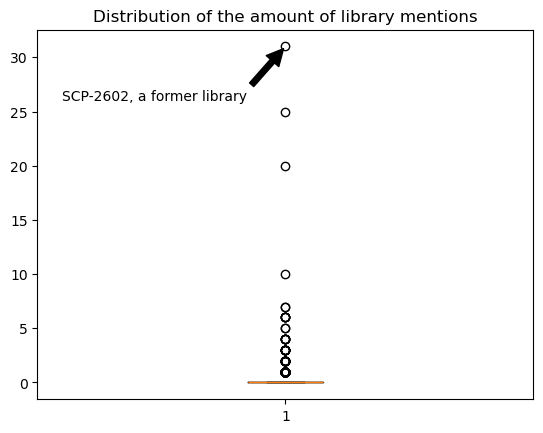

In [236]:
plt.boxplot(df["Library mentions"])
plt.title("Distribution of the amount of library mentions")
point_x, point_y = 1, 31
plt.annotate('SCP-2602, a former library', 
             xy=(point_x, point_y), 
             xytext=(point_x-0.45, point_y-5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

For comparison, [SCP-3008](https://scp-wiki.wikidot.com/scp-3008) used to be an IKEA furniture store.

In [265]:
contains_count(str(df.loc[df['code'] == 'SCP-3008']["text"]), ["IKEA", "furniture store"])

7

SCP-3008's article contains a total of 7 mentions of the terms "IKEA" and "furniture store", which is less than a quarter of the amount of times SCP-2602's article contains the term "library"/"libraries". This shows how SCP-2602's former role as a library is more significant to its anomalous nature than SCP-3008's former role as an IKEA furniture store.

This is especially significant considering that SCP-2602, a former library, has a much shorter article that SCP-3008.

In [268]:
former_ikea_charc = len(str(df.loc[df['code'] == 'SCP-3008']["text"]))
former_library_charc = len(str(df.loc[df['code'] == 'SCP-2602']["text"]))
print(f"Character count for former IKEA SCP-3008's article: {former_ikea_charc}")
print(f"Character count for former library SCP-2602's article: {former_library_charc}")

Character count for former IKEA SCP-3008's article: 23885
Character count for former library SCP-2602's article: 5359


### Rating

Each article on the SCP Wiki is given a rating by users. An higher rating indicates that the article was appreciated by more users. SCP-2602, a former library, has a rating of 980.

In [280]:
df["rating"].describe()

count    6611.000000
mean      171.366359
std       257.473717
min       -36.000000
25%        56.000000
50%       107.000000
75%       200.000000
max      7663.000000
Name: rating, dtype: float64

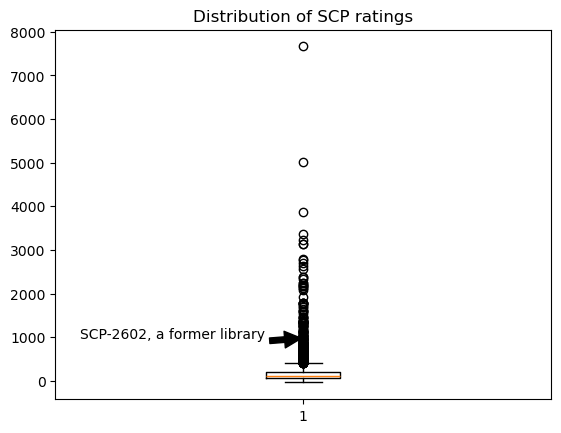

In [296]:
plt.boxplot(df["rating"].dropna())
plt.title("Distribution of SCP ratings")
point_x, point_y = 1, 980
plt.annotate('SCP-2602, a former library', 
             xy=(point_x, point_y), 
             xytext=(point_x-0.45, point_y),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

SCP-2602's article is well liked. As a matter of fact, it is more appreciated than the large majority of articles present in the dataset. This is likely a consequence of the fact that libraries, current or former, are generally well-liked, and therefore documentation about them is too.

### Type of class

Each SCP is assigned a [class](https://scp-wiki.wikidot.com/object-classes), typically an object class used to indicate how difficult to contain it is. SCP-2602, which used to be a library, has a library class of "former":

In [575]:
df["Class type"] = df["text"].apply(get_class_type)
df["Class type"].value_counts()

Class type
Object         4466
None           2454
Anomaly          43
Containment      25
Item              6
Disruption        2
Library           1
Site              1
Exhortation       1
Name: count, dtype: int64

"Library", as a class type, is unique. To go back to our comparison with SCP-3008, there is no "IKEA" or "Furniture store", or even "Store" class type. This highlights how significant being a library, former or current, is.

In [577]:
df["Class"] = df["text"].apply(get_class_spec)
class_counts = pd.DataFrame(df["Class"].value_counts())
class_counts.loc["Former"]

count    1
Name: Former, dtype: int64

"Former", as a class, is also unique.  This is once again an indication of how significant being a former library is.

In [586]:
df["Class"].value_counts().head()

Class
None        2456
Euclid      1897
Safe        1681
Keter        690
Thaumiel      72
Name: count, dtype: int64

The most frequent classes are all linked to containment: Safe, Euclid and Keter all indicate the level of difficulty of containing the SCP while Thaumiel indicates that the SCP can be used for the containment of one or more other SCPs. This is because the SCP Foundation's primary goal is, at its name indicates, to [secure and contain anomalies in order to protect humanity and the anomalies themselves from unpredictable and/or harmful anomalous behavior](https://scp-wiki.wikidot.com/about-the-scp-foundation). However, in the case of SCP-2602, containment is considered less relevant than the fact that it used to be a library.

## Conclusion

SCP-2602 is unique in how much its former use (as a library) influences every one of its current caracteristics as well as the characteristics of the information the Foundation has collected about it.

## Reference

"[SCP-2602, which used to be a library](https://scp-wiki.wikidot.com/scp-2602)" by Communism will win, from the [SCP Wiki](https://scpwiki.com/). Source: https://scpwiki.com/scp-2602. Licensed under [CC-BY-SA](https://creativecommons.org/licenses/by-sa/3.0/).